In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent= session.query(measurement.date).order_by(measurement.date.desc()).first()
recent

('2017-08-23',)

Text(0.5, 0, 'Date')

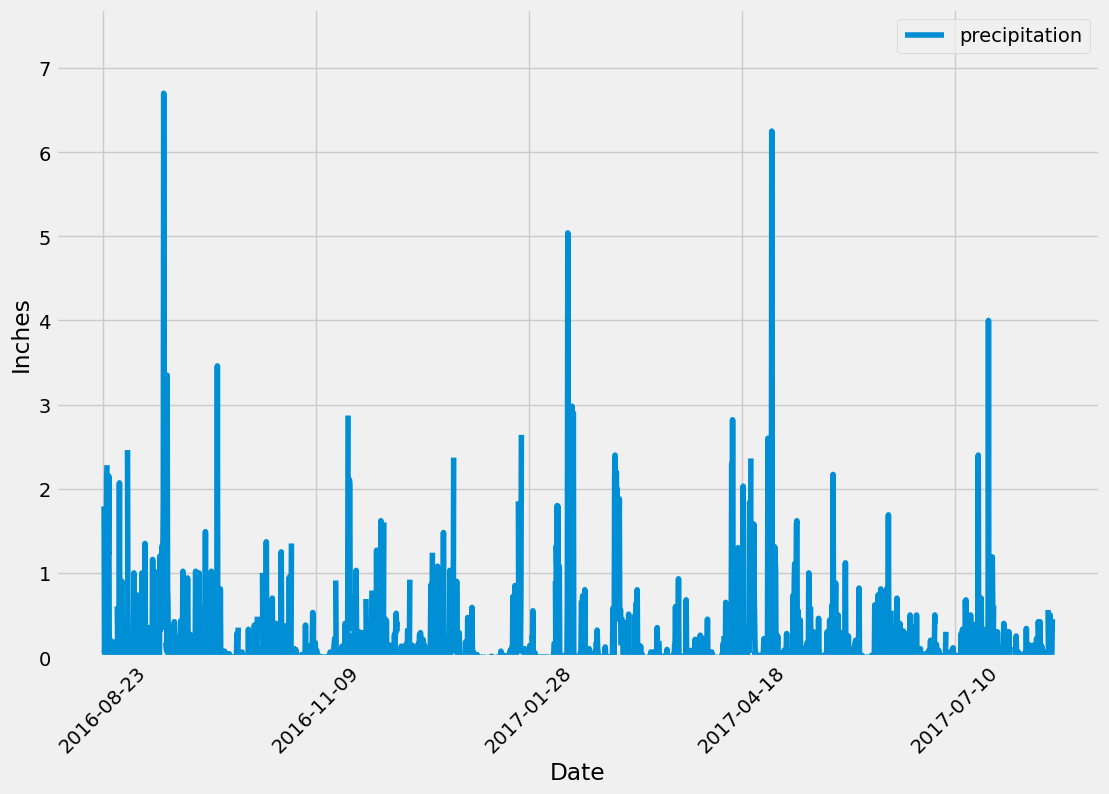

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent = dt.date(2017,8, 23)
# Calculate the date one year from the last date in data set.

recent_minus1 = recent - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores

pscores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= recent_minus1).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

p_df = pd.DataFrame(pscores).rename(columns = {'prcp': 'precipitation'})

# Sort the dataframe by date
p_df = p_df.set_index('date')
p_df = p_df.sort_values(by = ["date"])

# Use Pandas Plotting with Matplotlib to plot the data
p_df.plot(figsize = (12,8), rot = 45)
plt.legend(loc = 'upper right')
plt.ylim(0,7.7)
plt.ylabel('Inches')
plt.xlabel('Date')

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
p_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
total_stations = len(session.query(station).all())
print(total_stations)

9


In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_active = session.query(measurement.station, func.count(measurement.id)).group_by(measurement.station).order_by(
    func.count(measurement.id).desc()).all()
stations_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = stations_active[0][0]
temperature_stats = session.query(
    func.min(measurement.tobs),
    func.max(measurement.tobs),
    func.avg(measurement.tobs)
).filter(measurement.station == most_active_station).all()

lowest_temp = temperature_stats[0][0]
highest_temp = temperature_stats[0][1]
average_temp = temperature_stats[0][2]

print("Lowest Temperature: " + str(lowest_temp))
print("Highest Temperature: " + str(highest_temp))
print("Average Temperature: " + str(average_temp))

Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


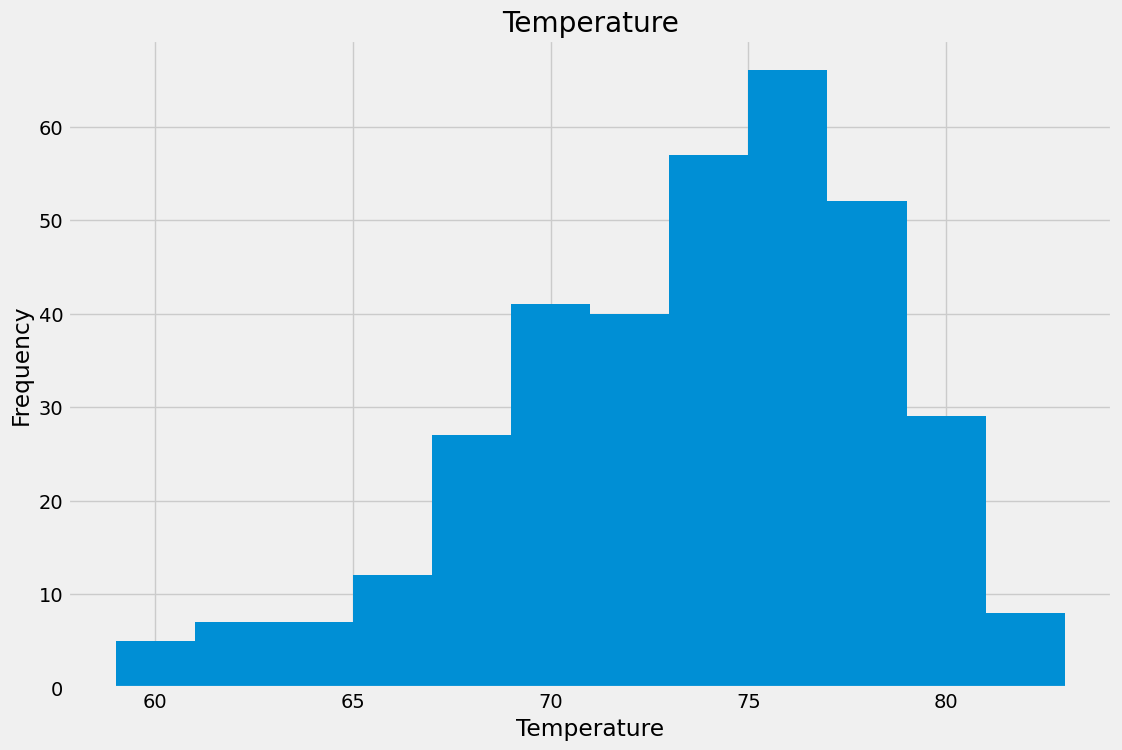

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_temp = session.query(measurement.station, measurement.tobs).filter( func.strftime('%Y-%m-%d', measurement.date)
            > recent_minus1, measurement.station == most_active_station).all()


df = pd.DataFrame(active_temp, columns=['Station', 'Temperature'])
df.hist(column='Temperature', bins=12, figsize=(12, 8))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


# Close Session

In [39]:
# Close Session
session.close()